In [1]:
#27.11.2018
from numpy import *
#%pylab inline
from pylab import *
#for ploting 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import AD_module as ad
import numpy as np
import ctypes

In [3]:
clight = 3*1e10

In [4]:
## Before running
## Compile the code with :
# python Python_setup.py build_ext -i -lcfitsio --inplace

# Compute the spectrum of the steady disk and then its total luminosity

In [5]:
Nint = 1500
spec = []
wavelength = []
step_wv = exp(log(1e0/1e-12)/Nint)
for i in range(Nint):
    spec.append(0.0)
    wavelength.append(1e-12*pow(step_wv,i))
    
spec = np.asarray(spec)
wavelength = np.asarray(wavelength)

In [6]:
ad.Spectrum(1.0, wavelength, spec, Nint)

0

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from IPython.kernel.zmq import kernelapp as app


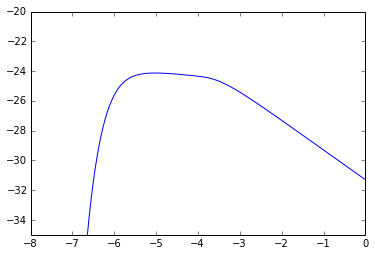

In [7]:
plt.ylim(-35,-20)
plt.plot(log(wavelength)/log(10.0), log(spec)/log(10.0))

In [8]:
summ = 0.0
for i in range(Nint-1):
    summ += 0.5*(spec[i+1]+ spec[i])*(wavelength[i+1]-wavelength[i])
print summ

2.32401008915e-28


# plot the plower law with the index of 1/3

In [9]:
def power_law(N, xdata, alpha):
    return N*xdata**(-alpha)

alpha = 0.333333333333
1500


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


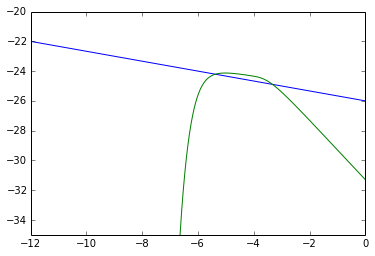

In [10]:
xdata = wavelength
N = 1e-26
alpha = 1.0/3
print 'alpha =', alpha
powerlaw_fun = []

for i in range(0,len(wavelength)):
        powerlaw_fun.append(power_law(N, xdata[i], alpha))

print len(powerlaw_fun)
plt.plot(log(xdata)/log(10),log(powerlaw_fun)/log(10))
#sig = str_exp_fun
plt.ylim(-35,-20)
plt.plot(log(wavelength)/log(10.0), log(spec)/log(10.0))

# Plot the illumunated light curve

In [11]:
#Initialization
Ntau = 7
tau_time = [3.0, 6.0, 10.0, 20.0, 40.0, 100.0, 200.0]
tau_time = np.asarray(tau_time)
ratio = [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]
ratio = np.asarray(ratio)

In [12]:
time_ILC = []
flux_ILC = []
fluxerr_ILC = []
with open('Output_Lstar.txt') as f:
    for line in f:
        data = line.split()
        #print float(data[0])
        time_ILC.append(float(data[0]))
        flux_ILC.append(float(data[1]))
        fluxerr_ILC.append(float(data[2]))
time_ILC = np.asarray(time_ILC)
flux_ILC = np.asarray(flux_ILC)
fluxerr_ILC = np.asarray(fluxerr_ILC)

mean_F = mean(flux_ILC)
print mean_F
flux_ILC = flux_ILC / mean_F
time_ILC = time_ILC-time_ILC[0]

2.53852905104


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


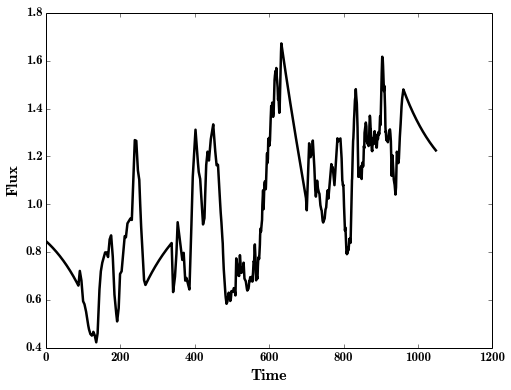

In [13]:
#if I want to save it in pdf
import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.lines as lns
from numpy.random import normal
#import matplotlib as mpl
#mpl.rcParams['axes.linewidth'] = 2 #set the value globally

font = {'family' : 'normal',
        'weight' : 'normal', #bold',
        'size'   : 13}
matplotlib.rc('font', **font) # it is for the tickness of axis and label
#You can find a full list of available properties on the Customizing matplotlib page.

# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.
with PdfPages('LC_Output_Lstar.pdf') as pdf:
    #plt.rc('text', usetex=True)
    plt.figure(figsize=(8, 6))
    plt.plot(time_ILC, flux_ILC, 'k', linewidth=2.5)#, label='UVW2 Swift band passes')
    #plt.legend(('UVW2 Swift band passes','rescaled'), loc = 0)
    #plt.hist(alpha_obs1, bins=20, histtype='step', color='k')
    #plt.legend(('all data'), loc = 0)
    #plt.vlines(x=-1.5, ymin=0, ymax=80, color="black", linewidth=1, linestyle="--", zorder=-1)
    #plt.text(-1.5, 100, 'IPD', fontsize=20)
    #plt.text(-1.5, 100, 'all data', fontsize=20)
    plt.ylabel('Flux', size =16)
    plt.xlabel('Time', size =16)
    ## set axis limits
    #plt.ylim(0, 1)
    #plt.xlim(1500, 3500)
    #pdf.savefig()
    #plt.close() #If I don't want to see plot in the screen like below I can open this one

# Compute one realization of the disk model for each band

In [14]:
#2) Compute UVW2 LC assuming illuminating source (Flux)
#follow the UVW2 fitted with the acretion disk model
#Filter=np.array([1,1,1,0,1,1])

In [15]:
#ad.AD_py(6,Filter, time, flux, ratio, tau_time, Ntime, Ntau)

In [16]:
t = []
flux0 = []
flux1 = []
flux2 = []
flux3 = []
flux4 = []
flux5 = []
for i in range(0,2000):
    t.append(float(0.5*float(i) + 0.0))
    flux0.append(float(0))
    flux1.append(float(0))
    flux2.append(float(0))
    flux3.append(float(0))
    flux4.append(float(0))
    flux5.append(float(0))
t = np.asarray(t)
flux0 = np.asarray(flux0)
flux1 = np.asarray(flux1)
flux2 = np.asarray(flux2)
flux3 = np.asarray(flux3)
flux4 = np.asarray(flux4)
flux5 = np.asarray(flux5)

ad.LightCurve(0, time_ILC, flux_ILC, len(time_ILC), t, flux0, len(t), 1.0)
ad.LightCurve(0, time_ILC, flux_ILC, len(time_ILC), t, flux1, len(t), 10.0)
ad.LightCurve(0, time_ILC, flux_ILC, len(time_ILC), t, flux2, len(t), 100.0)
ad.LightCurve(0, time_ILC, flux_ILC, len(time_ILC), t, flux3, len(t), 1000.0)
#ad.LightCurve(4, time_ILC, flux_ILC, len(time_ILC), t, flux4, len(t), 1.0)
#ad.LightCurve(5, time_ILC, flux_ILC, len(time_ILC), t, flux5, len(t), 1.0)

0

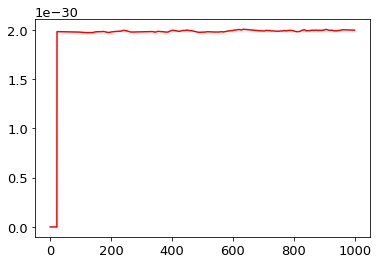

In [17]:
plt.plot(t, flux0, color = "red")

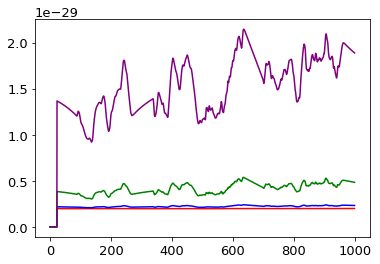

In [18]:
plt.plot(t, flux0, color = "red")
plt.plot(t, flux1, color = "blue")
plt.plot(t, flux2, color = "green")
plt.plot(t, flux3, color = "purple")

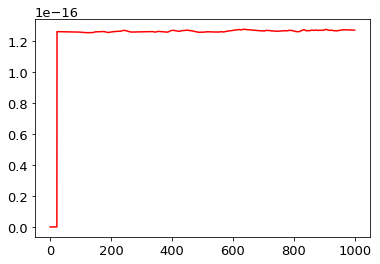

In [19]:
plt.plot(t, flux0*clight*(2120), color = "red")

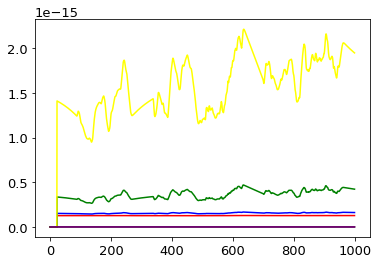

In [20]:
plt.plot(t, flux0*clight*(2120), color = "red")
plt.plot(t, flux1*clight*(2310), color = "blue")
plt.plot(t, flux2*clight*(2910), color = "green")
plt.plot(t, flux3*clight*(3440), color = "yellow")
plt.plot(t, flux4*clight*(4500), color = "black")
plt.plot(t, flux5*clight*(5430), color = "purple")

In [21]:
flux1[150]*clight*(2120)

1.36903830124036e-16

In [22]:
(2120*1e-10)

2.1200000000000002e-07

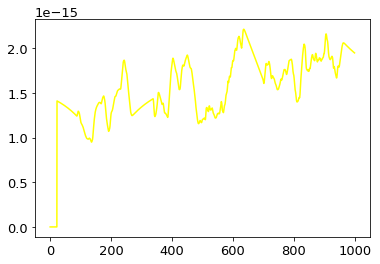

In [23]:
plt.plot(t, flux3*clight*(3440), color = "yellow")

# Compute one realization of the disk model for each band Without INTEGRATION OVER BAND PASSES

In [24]:
#2) Compute UVW2 LC assuming illuminating source (Flux)
#follow the UVW2 fitted with the acretion disk model
#Filter=np.array([1,1,1,0,1,1])

In [25]:
#ad.AD_py(6,Filter, time, flux, ratio, tau_time, Ntime, Ntau)

In [14]:
t = []
flux0 = []
for i in range(0,2000):
    t.append(float(0.5*float(i) + 0.0))
    flux0.append(float(0))
t = np.asarray(t)
flux0 = np.asarray(flux0)

ad.LightCurve_no_integration(time_ILC, flux_ILC, len(time_ILC), t, flux0, len(t), 1.0)


0

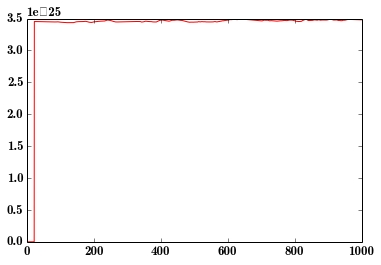

In [15]:
plt.plot(t, flux0, color = "red")

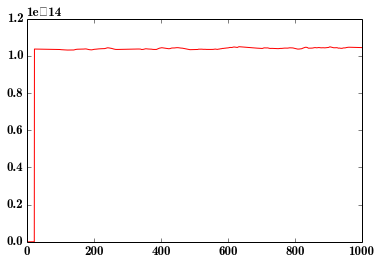

In [16]:
plt.plot(t, flux0*clight, color = "red")

In [17]:
flux1[150]*clight*(2120)

NameError: name 'flux1' is not defined

In [31]:
(2120*1e-10)

2.1200000000000002e-07

# plot the observed light curve

In [22]:
#Note I delated the values between 2454270.830 - 2454318.094
time_obs = []
flux_obs = []
fluxerr_obs = []
with open('Filter/U_timeflux.txt') as f:
    for line in f:
        data = line.split()
        #print float(data[0])
        time_obs.append(float(data[0]))
        flux_obs.append(float(data[1]))
        fluxerr_obs.append(float(data[1]))
time_obs = np.asarray(time_obs)
print time_obs[0]
time_obs = time_obs-2400000
flux_obs = np.asarray(flux_obs)
fluxerr_obs = np.asarray(fluxerr_obs)
print time_obs[0]

2456431.67
56431.669999999925


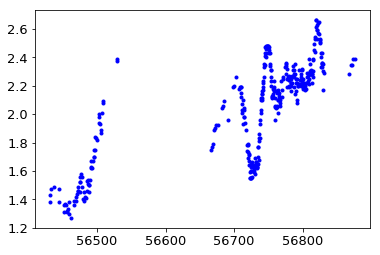

In [23]:
plt.plot(time_obs, flux_obs, 'b.', linewidth=2.5)

In [24]:
#time_obs = time_obs-time_obs[0]
time_obs = time_obs-12.5 #days 
#print time_obs
mean_flux_obs = mean(flux_obs)
print mean_flux_obs
flux_obs = flux_obs / mean_flux_obs

2.033965909090909


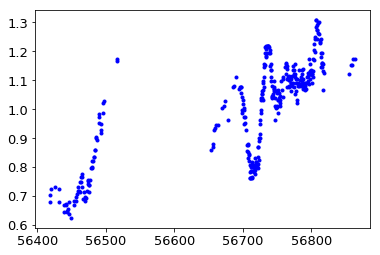

In [25]:
plt.plot(time_obs, flux_obs, 'b.', linewidth=2.5)

# Compare all LCs (ILC, one realization of disk model, observed)

In [26]:
time_ILC = time_ILC + 55900
t = t + 55900
Flux_U = flux3*clight*(3440)*1e14

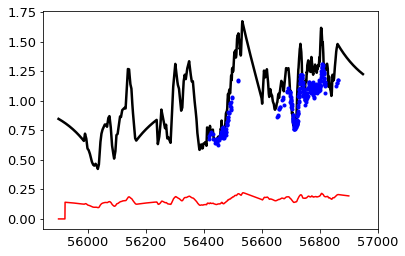

In [27]:
plt.plot(time_ILC, flux_ILC, 'k', linewidth=2.5)
plt.plot(t, Flux_U, color = "red")
plt.plot(time_obs, flux_obs, 'b.', linewidth=2.5)
#plt.xlim(56400, 56920)